# K부터 출발해 모든 노드가 신호를 받을 수 있는 시간을 계산하라. 불가능할 경우 -1 을 리턴한다. 
# 입력값 (u,v,w)는 각각 출발지, 도착지, 소요 시간으로 구성되며 전체 노드의 개수는 N으로 입력 받는다.

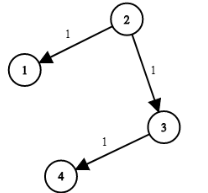


- 입력
    ```python
    times = [[2,1,1],[2,3,1],[3,4,1]] , N = 4, K = 2
    ```

- 출력
    ```python
    2
    ```

- 설명
    - 2번 노드는 1번, 3번 노드와 연결되어 있고 소비시간은 1이다. 3번 노드는 4번 노드와 연결되어 있고, 소비 시간은 1이다.
    - 따라서 2->[1,3] 3->4 각각 1초씩 소모되어 1+1 = 2 이므로 총 소요시간은 2 이다. 

- __이 문제에서는 다음과 같은 2가지 사항을 판별해야 한다.__

    1. __모든 노드가 신호를 전달받는데 걸리는 시간__

    2. __모든 노드에 도달할 수 있는지 여부__


- 우선 첫번째로 모든 노드가 신호를 전달받는데 걸리는 시간이란, 가장 오래 걸리는 노드까지의 시간이라 할 수 있다.

    - 즉 가장 오래 걸리는 노드까지의 최단 시간을 말하며, 이는 다익스트라 알고리즘으로 추출할 수 있다.

    


- 두번째는 모든 노드에 도달할 수 있는지 여부이다. 이는 모든 노드의 다익스트라 알고리즘 계산값이 존재하는지 유무로 판별할 수 있다.

    - 만약 노드가 8개인데 다익스트라 알고리즘 계산은 7개밖에 없다면 나머지 한 노드에는 도달할 수 없다는 의미이다. 이 경우 -1 을 리턴한다.


- 다 익스트라 알고리즘을 좀 더 효율적으로 구현하기 위해 우선순위 큐를 사용한다. 여기선 heapq 를 사용하는 형태로 구현한다.

1. 일단 뭐든간에 그래프부터 구성한다.
2. 다음은 우선순위 큐를 위한 큐 변수를 정의한다.

    ```python
    Q=[(0,K)]
    dist = collections.defaultdict(int)
    ```

3. 큐 변수는 '(소요시간, 정점)' 구조로 작성한다. 즉 시작점에서 정점까지의 소요시간을 담아둘 것이다.
4. 초기값은 시작점 K부터이므로 소요시간은 0이고, 따라서 (0,K) 로 구성한다.
5. 거리를 의미하는 dist 변수는 아직 아무것도 셋팅하지 않는다. 
    
    ```python
    while Q:
        time, node = heapq.heappop(Q)
        if node not in dist:
            dist[node] = time
            for v,w in graph[node]:
                alt = time + w
                heapq.heappush(Q,(alt,v))
    ```
6. 큐 순회를 시작하자마자 최소값을 추출한다. dist 에 node 의 포함 여부를 체크한다. 
7. dist 값에 아무 값도 셋팅하지 않기 때문에 처음에는 이 값이 비어있고, 이 경우에만 heap에 푸시하는 형태로 구현한다.
    - 이렇게 함으로써 큐의 우선순위를 업데이트할 필요 없이 존재 유무로만 진행할 수 있으며 dist 에는 항상 최솟값이 셋팅될 것이다. 정말로 그런지 그림으로 확인해보자.
    - 문제의 예제 입력은 너무 단순하기 때문에 좀 더 복잡하게 입력값을 조정하고 그림으로 나타내보자.
    
    ```python
    [[3,1,5],[3,2,2],[2,1,2],[3,4,1],[4,5,1],[5,6,1],[6,7,1],[7,8,1],[8,1,1]] 
    ```


    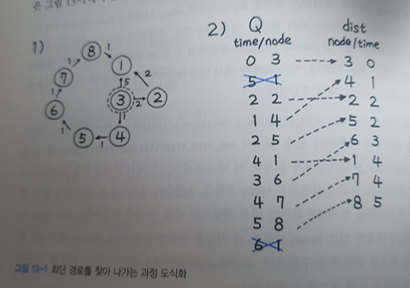

1. 그림 13-1 의 1) 은 입력값을 그래프로 표현한 것이다. 시작점인 3을 중심으로 세 방향으로 뻗어나가는 구조이다. 

2. 2)의 Q와 dist 는 위에서부터 차례로, 변수에 삽입되는 순서대로 값을 나열했다. 

3. 여기서 Q는 우선순위 큐이므로 값이 계속해서 쌓이다가 낮은 값부터 하나씩 추출되면서(최소 힙이다) 제거된다.

4. dist 에 존재하지 않는다면 바로 dist 값으로 time 과 node 의 순서가 바뀌면서 입력되고, 이미 dist에 키가 존재한다면 그 값은 버리게 된다.

5. 앞서 설명한 것처럼 dist에는 항상 최소값부터 세팅되기 때문에 이미 값이 존재한다면 그 값은 이미 최단경로이고, 새롭게 큐에서 삽입되는 값은 더 오래 걸리는 경로이기 떄문에 버린다.

6. 이 그림에서는 [5,1], [6,1] 두 가지가 버려진다. 실제로 노드 1은 3->2->1 순으로 방문하면 소요시간 4에 도달하며 5와 6은 모두 이보다 오래 걸린다.

7. 마지막으로 모든 노드에 도달할 수 있는지 여부를 다음과 같이 판별한다.

```python
# 모든 노드의 최단 경로 존재 여부 판별
    if len(dist) == N:
        return max(dist.values())
    return -1
```
- 여기서는 dist 딕셔너리의 키 개수가 N과 동일한지 체크한다. 전체 노드 개수만큼이 모두 dist에 있다면 모든 노드의 최단 경로를 구했다는 뜻이다.

- 이는 모두 시작점에서 도달이 가능하다는 의미이기도 하다. 만약 노드 개수가 하나라도 모자란다면 시작점에서 도달할 수 없다는 뜻이며, 앞선 판별조건 중 두번쨰를 만족하지 못하므로 -1 을 리턴한다.

- 최종적인 코드는 아래와 같다.


In [ ]:
# 다익스트라 알고리즘 구현
import collections
import heapq
def networkDelayTime(times, N:int, K:int)->int:
    graph = collections.defaultdict(list)
    
    # 그래프 인접 리스트 구성
    for u,v,w in times: # u 는 출발점, v 는 도착점, w 는 소요시간
        graph[u].append((v,w))
    
    # 큐 변수 [(소요시간, 정점)]
    Q = [(0,K)] # 최초 큐는 K 정점에서 시작하며, 소요시간은 0이다. (자기자신이므로) 
    dist = collections.defaultdict(int)

    
    # 우선순위 큐 최솟값 기준으로 정점까지 최단 경로 삽입
    while Q:
        time, node = heapq.heappop(Q)  # heapq.heappop(heap) 함수는 heapq 모듈에서 제공되는 함수로, 힙(Heap)에서 가장 작은 값을 제거하고 반환하는 기능을 수행
        
    
        # 해당 정점이 dist에 없는 경우에만 처리 
        if node not in dist: 
            dist[node] = time  # 해당 정점까지의 최단 소요시간을 저장

    
             # 인접한 정점들에 대해 탐색
            for v, w in graph[node]:
                alt = time + w # 다음 정점까지의 소요시간을 계산
                heapq.heappush(Q, (alt,v)) # 우선순위 큐에 새로운 경로를 추가


                # heap = []
                # heapq.heappush(heap, (3, 'A'))  # (3, 'A') 요소를 추가.  heap = 입력기준이 되는 배열, () 는 들어갈 요소 -> [(3,'A')]


    # 모든 노드의 최단 경로 존재 여부 판별
    if len(dist) == N:
        return max(dist.values()) # 가장 긴 소요시간을 반환
    return -1

# 큐란?

- 큐(Queue)는 먼저 들어오는 데이터가 먼저 나가는 FIFO(First In First Out) 형식의 자료구조이다.

- 우선순위 큐(Priority Queue)는 먼저 들어오는 데이터가 아니라, 우선순위가 높은 데이터가 먼저 나가는 형태의 자료구조이다.

 

- 우선순위 큐는 일반적으로 힙(Heap)을 이용하여 구현한다.

# 힙이란?

- 힙(Heap)은 우선순위 큐를 위해 고안된 완전이진트리 형태의 자료구조이다.

- 여러 개의 값 중 최댓값 또는 최솟값을 찾아내는 연산이 빠르다.

 

## 힙의 특징

- 완전이진트리 형태로 이루어져 있다.

- 부모노드와 서브트리간 대소 관계가 성립된다. (반정렬 상태)

- 이진탐색트리(BST)와 달리 중복된 값이 허용된다.

## 최소힙이란?

- 최소 힙 (Min Heap)

- 부모 노드의 키 값이 자식 노드보다 작거나 같은 완전이진트리이다.

- ❝ key(부모노드) ≥ key(자식노드) ❞

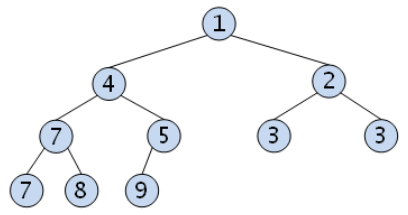